In [18]:
from src.GoogleTrendsScraper import GoogleTrendsScraper


# 'C:/Users/juan.david.RND/Downloads/geckodriver-v0.33.0-win64/geckodriver.exe'

gts = GoogleTrendsScraper(
    sleep=10, path_driver='C:/Users/juan.david.RND/Downloads/chromedriver-win32/chromedriver.exe', headless=False)
data = gts.get_trends('bitcoin', '2023-10-01', '2023-10-23',)

del gts


TypeError: only integer scalar arrays can be converted to a scalar index

In [10]:
import httpx
import json
import pandas as pd

result = []
geo_location = "US"

# Decrement the date parameter to get trends data of previous days
for day in range(20230921, 20230919, -1):
    
    url = f"https://trends.google.com/trends/api/dailytrends?hl=en-{geo_location}&tz=-180&ed={day}&geo=US&hl=en-US&ns=15"

    response = httpx.get(url=url)
    data = json.loads(response.text.replace(")]}',", ""))
    
    # Extract the formatted date from the JSON data
    date = data["default"]["trendingSearchesDays"][0]["formattedDate"]

    for trend in data["default"]["trendingSearchesDays"][0]["trendingSearches"]:
        trend_object = {
            "Title": trend["title"]["query"],
            "Traffic volume": trend["formattedTraffic"],
            "Link": "https://trends.google.com/" + trend["title"]["exploreLink"],
            "Type": "Trend_topic",
            "Date": date,
            "Geo Location": geo_location
        }
        result.append(trend_object)

    print(result)

df = pd.DataFrame(result)
df.to_csv("trends.csv", index=False)

Exception ignored in: <function GoogleTrendsScraper.__del__ at 0x0000029B9D3AB310>
Traceback (most recent call last):
  File "C:\Users\juan.david.RND\Documents\GitHub\GoogleTrends-Scraper\src\GoogleTrendsScraper.py", line 486, in __del__
    shutil.rmtree('tmp')
  File "C:\ProgramData\Anaconda3\lib\shutil.py", line 748, in rmtree
    return _rmtree_unsafe(path, onerror)
  File "C:\ProgramData\Anaconda3\lib\shutil.py", line 607, in _rmtree_unsafe
    onerror(os.scandir, path, sys.exc_info())
  File "C:\ProgramData\Anaconda3\lib\shutil.py", line 604, in _rmtree_unsafe
    with os.scandir(path) as scandir_it:
FileNotFoundError: [WinError 3] The system cannot find the path specified: 'tmp'
Exception ignored in: <function GoogleTrendsScraper.__del__ at 0x0000029B9D3AB310>
Traceback (most recent call last):
  File "C:\Users\juan.david.RND\Documents\GitHub\GoogleTrends-Scraper\src\GoogleTrendsScraper.py", line 486, in __del__
    shutil.rmtree('tmp')
  File "C:\ProgramData\Anaconda3\lib\shuti

IndexError: list index out of range

In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

"https://trends.google.com/trends/explore?date=2023-09-24%202023-10-24&q=bitcoin&hl=en"

def get_google_trends_data(query, timeframe):
    url = f"https://trends.google.com/trends/explore?date={timeframe}&q={query}&hl=en"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    time.sleep(2)  # Adding a delay to avoid getting blocked
    scripts = soup.find_all('script')
    for script in scripts:
        if 'var timelineData' in str(script):
            data = str(script).split('var timelineData = ')[1].split('var color')[
                0].strip()[:-1]
            data = eval(data)
            return data

# Scraping hourly data for the past 10 years
dataframes = []
for i in range(2):
    timeframe = f"2023-09-24 2023-10-24"
    trends_data = get_google_trends_data('bitcoin', timeframe)
    if trends_data:
        df = pd.DataFrame(trends_data)
        dataframes.append(df)

# Concatenating dataframes
dataframes
# result_df = pd.concat(dataframes)
# print(result_df)



[]

In [27]:
url = "https://trends.google.com/trends/explore?date=2023-09-24%202023-10-24&q=bitcoin&hl=en"

headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
soup

<html lang="en"><meta charset="utf-8"/><meta content="initial-scale=1, minimum-scale=1, width=device-width" name="viewport"/><title>Error 429 (Too Many Requests)!!1</title><style nonce="1PsGHLr5u3RCnMqj-p3X2w">*{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{color:#222;text-align:unset;margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px;}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}pre{white-space:pre-wrap;}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color

In [30]:
pip install fake_useragent


Note: you may need to restart the kernel to use updated packages.


In [31]:
import requests
from bs4 import BeautifulSoup
import time
from fake_useragent import UserAgent

def get_page_with_retries(url, headers, retries=5):
    for i in range(retries):
        try:
            response = requests.get(url, headers=headers)
            return response
        except requests.RequestException as e:
            print(f"Request failed. Retrying... ({i+1}/{retries})")
            time.sleep(2)  # Wait for a few seconds before retrying
    return None

def get_google_trends_data(query, timeframe):
    url = f"https://trends.google.com/trends/explore?date={timeframe}&q={query}&hl=en"
    ua = UserAgent()
    headers = {
        "User-Agent": ua.random,
    }
    response = get_page_with_retries(url, headers)
    if response is not None:
        soup = BeautifulSoup(response.text, 'html.parser')
        return soup
    else:
        return None

# Define your query and timeframe
query = 'bitcoin'
timeframe = '2023-09-24%202023-10-24'

# Call the function to get the data
soup = get_google_trends_data(query, timeframe)

if soup is not None:
    print(soup)
else:
    print("Failed to retrieve the page.")

<html lang="en"><meta charset="utf-8"/><meta content="initial-scale=1, minimum-scale=1, width=device-width" name="viewport"/><title>Error 429 (Too Many Requests)!!1</title><style nonce="I24t_gDznhVsTDFAU5k0sQ">*{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{color:#222;text-align:unset;margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px;}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}pre{white-space:pre-wrap;}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color

# Working

In [102]:
from pytrends.request import TrendReq
from datetime import date, timedelta

# Login to Google. Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

#Inputs
period = 30
overlap = 15
query = ['bitcoin']


first_date = date(2023, 8, 1)
last_date = date.today()

df = pd.DataFrame()
dict_df = {}
dict_id = 0

while last_date > first_date:
    
    first_date_temp = (last_date - timedelta(days=period + overlap))
    timeframe_str = first_date_temp.strftime("%Y-%m-%d") + " " + last_date.strftime("%Y-%m-%d")
    
    #Pytrends code
    print(timeframe_str)
    
    # Create payload and capture API tokens. You can modify the payload according to your requirements.
    pytrend.build_payload(kw_list=query, timeframe=timeframe_str)
    # Interest Over Time
    df_temp = pytrend.interest_over_time().drop(columns = ["isPartial"])
    
    #Assigns df to a dict
    dict_df[dict_id] =  df_temp
    
    #Applies normalization beyond the first dataframe
    if dict_id != 0:
        df_rat  = dict_df[dict_id-1].merge(dict_df[dict_id], left_index=True, right_index=True, suffixes = ["_0", "_1"])
        df_rat["rat"] = df_rat["bitcoin_0"]/df_rat["bitcoin_1"]
        rat = df_rat["rat"].mean()

        dict_df[dict_id] = dict_df[dict_id]*rat

    #Concatenates dataframe
    df  = pd.concat([df, dict_df[dict_id]]).sort_values(by = "date")
        
    #Advances in time and counter of dataframes
    last_date = last_date - timedelta(days=period)
    dict_id = dict_id + 1 
    
df.to_csv("BTC_trends.csv")

2023-09-09 2023-10-24
2023-08-10 2023-09-24
2023-07-11 2023-08-25


<AxesSubplot:xlabel='date'>

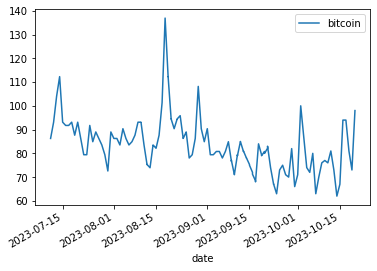

In [103]:
df.plot()

,bitcoin
date,
2023-08-10,93.322284
2023-08-11,83.715578
2023-08-12,75.481259
2023-08-13,74.108872
2023-08-14,85.087964
...,...
2023-10-16,94.000000
2023-10-17,92.000000
2023-10-18,87.000000


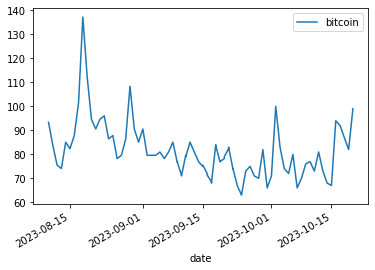

In [97]:
df_rat  = dict_df[0].merge(dict_df[1], left_index=True, right_index=True, suffixes = ["_0", "_1"])
df_rat["rat"] = df_rat["bitcoin_0"]/df_rat["bitcoin_1"]
rat = df_rat["rat"].mean()
rat

df_corrected = dict_df[1]*rat

df  = pd.concat([dict_df[0], df_corrected]).sort_values(by = "date")
df.plot()
df



In [89]:
dict_df[0]

,bitcoin
date,
2023-09-09,77
2023-09-10,71
2023-09-11,79
2023-09-12,85
2023-09-13,81
2023-09-14,77
2023-09-15,75
2023-09-16,72
2023-09-17,68


In [71]:
from pytrends.request import TrendReq

# Login to Google. Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

# Create payload and capture API tokens. You can modify the payload according to your requirements.
pytrend.build_payload(kw_list=['bitcoin'], timeframe=timeframe_str)

# Interest Over Time
df = pytrend.interest_over_time()

